# Austin Animal Center Needs Analysis

![Austin-shelter](./images/austin-animal-center.jpg)

## Overview

This project analyzes the resource needs of the [Austin Animal Center](https://www.austintexas.gov/department/aac) (AAC), which shelters 16,000 animals annually. Descriptive analysis of animal intake and outcome data shows that the number of sheltered animals varies seasonally, with intakes peaking in summer months and exits peaking in winter months. The Austin Animal Center can use this analysis to adjust hiring and space acquisition to account for these seasonal trends.

## Business Problem

![img](./images/animals.png)

The Austin Animal Shelter may be able to improve their resource allocation to both reduce costs and ensure that the center has staff and space to care for the animals brought to them. Doing so will allow the Austin Animal Shelter to better serve its clients while also freeing up resources to expand the scope of services they can offer. Using AAC's animal intake and outcome data, I aim to describe seasonal patterns of intakes and exits to anticipate AAC's space and staffing needs for supporting sheltered animals.

For resources, I chose to focus on factors that would impact **cost** and _staffing_:

- breed/specialization of staff
- funds for neutering animals
- average stay of animals - would impact resources needed (food, cleaning, space)
- condition of animals when they enter the shelter
- percent of "special needs" animals - babies/seniors

![img2](./images/pet-resource-center-og.jpg)

## Data Understanding

The Austin Animal Center has the longest running public dataset of animal rescues in the country. Every animal has a unique ID associated with both their [intake](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and [outcome](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) data. The data files provide the dates and types of each event, as well as other animal characteristics (e.g. type, sex). 

In [1]:
import pandas as pd
import numpy as np

In [14]:
intakes = pd.read_csv('./data/Austin_Animal_Center_Intakes_082620.csv')
outcomes = pd.read_csv('./data/Austin_Animal_Center_Outcomes_082620.csv')

In [15]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119853 entries, 0 to 119852
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         119853 non-null  object
 1   Name              82042 non-null   object
 2   DateTime          119853 non-null  object
 3   MonthYear         119853 non-null  object
 4   Found Location    119853 non-null  object
 5   Intake Type       119853 non-null  object
 6   Intake Condition  119853 non-null  object
 7   Animal Type       119853 non-null  object
 8   Sex upon Intake   119852 non-null  object
 9   Age upon Intake   119853 non-null  object
 10  Breed             119853 non-null  object
 11  Color             119853 non-null  object
dtypes: object(12)
memory usage: 11.0+ MB


In [16]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119962 entries, 0 to 119961
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         119962 non-null  object
 1   Name              82265 non-null   object
 2   DateTime          119962 non-null  object
 3   MonthYear         119962 non-null  object
 4   Date of Birth     119962 non-null  object
 5   Outcome Type      119956 non-null  object
 6   Outcome Subtype   54873 non-null   object
 7   Animal Type       119962 non-null  object
 8   Sex upon Outcome  119961 non-null  object
 9   Age upon Outcome  119959 non-null  object
 10  Breed             119962 non-null  object
 11  Color             119962 non-null  object
dtypes: object(12)
memory usage: 11.0+ MB


### Intake Data

The intake dataset starts in October 2013 and includes a wide variety of intake types, intake conditions, and animal types.

In [17]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [18]:
intakes['Intake Date'] =  pd.to_datetime(intakes['DateTime'])
intakes['Intake Date'].describe()

count                  119853
unique                  84556
top       2016-09-23 12:00:00
freq                       64
first     2013-10-01 07:51:00
last      2020-08-26 07:01:00
Name: Intake Date, dtype: object

In [6]:
intakes['Intake Type'].value_counts()

Stray                 83873
Owner Surrender       23493
Public Assist          7349
Wildlife               4702
Euthanasia Request      257
Abandoned               179
Name: Intake Type, dtype: int64

In [7]:
intakes['Intake Condition'].value_counts()

Normal      104686
Injured       6196
Sick          4775
Nursing       3330
Aged           414
Other          221
Feral          106
Pregnant        74
Medical         43
Behavior         8
Name: Intake Condition, dtype: int64

In [21]:
intakes['Animal Type'].value_counts()

Dog          67990
Cat          44947
Other         6337
Bird           558
Livestock       21
Name: Animal Type, dtype: int64

### Outcome Data

The outcome dataset also starts in October 2013 and includes a wide variety of outcome types.

In [22]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [23]:
outcomes['Outcome Date'] =  pd.to_datetime(outcomes['DateTime'])
outcomes['Outcome Date'].describe()

count                  119962
unique                  98921
top       2016-04-18 00:00:00
freq                       39
first     2013-10-01 09:31:00
last      2020-08-26 09:19:00
Name: Outcome Date, dtype: object

In [25]:
outcomes['Outcome Type'].value_counts()

Adoption           52875
Transfer           35640
Return to Owner    20947
Euthanasia          8112
Died                1122
Rto-Adopt            636
Disposal             536
Missing               67
Relocate              21
Name: Outcome Type, dtype: int64

## Data Preparation

### Data Cleaning

For the intake and outcome files, address the following issues:

- Dates not in the correct datetime format
- Column names have mixed cases and spaces 
- Unnecessary columns tht can be dropped

In [3]:
outcomes = dc.prep_outcomes_file(outcomes)
intakes = dc.prep_intakes_file(intakes)

I then merge the two files into a single dataset for feature engineering and analysis.

In [ ]:
animal_shelter_df = dc.merge_files(intakes,outcomes)

### Feature Engineering

In [4]:
animal_shelter_df = fe.create_species_var(animal_shelter_df)
animal_shelter_df = fe.create_neutered_var(animal_shelter_df)
animal_shelter_df = fe.reduce_breed_list(animal_shelter_df)

In [ ]:
animal_shelter_df.to_csv('./data/cleaned_animal_center_df.csv')

#### Create appropriate level of granularity for animal species and breed.

Exploritory analysis revealed that the two variables that describe the "type" of animal were `animal_type` and `breed`.

`animal_type` has five values: Dog, Cat, Bird, Livestock, and Other.

While `animal_type`s Cat and Dog were straight forward, "Other" appeared to hold a mix of species - both pets and wildlife. 

Within "Other" there is a lot of fuzzy matching within the breed variable.

![breeds](./images/breeds_i.png)

For example "Rabbit" and "Guinea Pig" each had repeat entries. To find a middle ground, I created the function `create_species_var` to map and aggregate the `breed` and `intake_type` to provide more insight into the types of animals the shelter services.

I then used my function `reduced_breed_list` to remov "mix" from many of the cat and dog breeds. This allowed "Domestic Shorthair Mix" cats to be counted along with "Domestic Shorthair" and the same with "German Shepard Mix" being count as a "German Shepard."

I've chosen not to analyze livestock, as there are only 12 of them in the dataset.

#### A deep look at neutering

Neutering of animals at the Austin Animal Center is funded by [The City of Austin and Travis County](https://www.austintexas.gov/page/no-kill-plan), but how many neuterings are they doing a month? Is that number increasing  or decreasing? By comparing the variables `sex_upon_intake` and `sex_upon_outcome` for each animal, a change in status from "intact" to "neutered" reveals the animal was neutered during their stay at the Rescue Center.

## Methods

#### Revisit our questions

- Age of animals in shelter
- Average animal length of stay
- Medical staff needed

In [33]:
## Creates table visualizations
viz_t.value_counts_table(animal_shelter_df.species.value_counts().append(pd.Series(animal_shelter_df.shape[0], index=["Total"])), "Animal Intake since 2013", "species_i")
viz_t.value_counts_table(animal_shelter_df.loc[animal_shelter_df.year==2019].species.value_counts().append(pd.Series(animal_shelter_df.loc[animal_shelter_df.year==2019].shape[0], index=["Total"])), "Animal Intake since 2013", "intake_2019")

In [34]:
## Creates time series graohs of intakes by animal species/type

# Get intake count of cats and dogs over time
summed_df = animal_shelter_df.loc[(animal_shelter_df['species'].str.contains("Dog|Cat"))].groupby([pd.Grouper(key="date_i",freq='1M'), 'species']).count()\
                .reset_index().pivot(index='date_i', columns='species', values='animal_id')
viz_g.time_series_plot(summed_df,"Seasonal Intake patterns of Cats and Dogs","Date by Month","Intake Count","intake_cat_dog",100)

# Get intake count of wildlife over time
summed_wildlife = animal_shelter_df.loc[(animal_shelter_df['species'].str.contains("Wildlife"))].groupby([pd.Grouper(key="date_i",freq='1M'), 'species']).count()\
                .reset_index().pivot(index='date_i', columns='species', values='animal_id')
viz_g.time_series_plot(summed_wildlife,"Intake patterns of Wildlife","Date by Month","Intake Count",'wildlife_count',10)

# Get intake count of all others over time
summed_df_small_b = animal_shelter_df.loc[(~animal_shelter_df['species'].str.contains("Dog|Cat|Wildlife"))].groupby([pd.Grouper(key="date_i",freq='1M'), 'species']).count()\
                .reset_index().pivot(index='date_i', columns='species', values='animal_id')
viz_g.time_series_plot(summed_df_small_b,"Intake patterns of Animals that aren't Cats or Dogs","Date by Month","Intake Count",'other_species_count',10)

# Highlight history of Chickens, Rabbits, and Guinea Pigs over time
summed_df_small_pets = animal_shelter_df.loc[(animal_shelter_df['species'].str.contains("Chicken|Rabbit|Guinea"))].groupby([pd.Grouper(key="date_i",freq='1M'), 'species']).count()\
                .reset_index().pivot(index='date_i', columns='species', values='animal_id')
viz_g.time_series_plot(summed_df_small_pets,"Intake History of Chickens, Rabbits, and Guinea Pigs","Date by Month","Intake Count",'small_pet_count',5)

<Figure size 1280x800 with 0 Axes>

<Figure size 1280x800 with 0 Axes>

<Figure size 1280x800 with 0 Axes>

<Figure size 1280x800 with 0 Axes>

In [60]:
test = animal_shelter_df.loc[(animal_shelter_df['species'].str.contains("Dog|Cat")) & (animal_shelter_df.neutered ==1)].groupby([pd.Grouper(key="date_i",freq='1M'), 'species']).count()\
                .reset_index().pivot(index='date_i', columns='species', values='animal_id')

test.columns = ['Cat_neutered', "Dog_neutered"]

test2 = pd.concat([summed_df, test], axis=1)

test2['percent_cat'] = test2.Cat_neutered/test2.Cat
test2['percent_dog'] = test2.Dog_neutered/test2.Dog
test2.drop(columns = ['Cat', 'Dog', 'Cat_neutered', 'Dog_neutered'], inplace = True)
test2.columns = ['Cat', 'Dog']


In [77]:
viz_g.time_series_plot_percent(test2,"History of Percent Neutered at Intake" ,"Date by Month","Percent Neutered","neutered_over_time2", 0.05)

<Figure size 1280x800 with 0 Axes>

## Animal Intake Overall

| ![all3](./images/species_i.png) | ![2019a](./images/intake_2019.png)

## Animal Intake Trends

![one](./images/intake_cat_dog.png) 
![two](./images/wildlife_count.png)

### Only non-seasonal pattern
![foura](./images/small_pet_count.png)

## Neutering patterns

![neut](./images/neutered_over_time2.png)

## Medical Staffing needs:

### Findings: 

### Intake Patterns:
- The intake of cats and dogs seems to have a seasonal pattern that remains relatively constant
- Wildlife also seems fairly seasonal, with perhaps a slight downward trend since 2017
- For those animals who have seasonal patterns, winter is a low time for all
- Rabbits, chickens, and guinea pigs do not appear to have a seasonal patter
- Rabbits, chickens, and guinea pigs *do* appear to have sudden spikes

### Neutering:
- about 30-55% of cats who come in are neutered during their stay
- about 40-55% of dogs who come in are neutered during their stay, smaller variance than cats

### Comparison of Outcomes for Neutered vs Intact

In [139]:
# Get percent intact
intact_count = animal_shelter_df.loc[(animal_shelter_df.species.str.contains("Dog|Cat")) & (animal_shelter_df.sex_upon_outcome.str.contains("Intact"))].outcome_type.value_counts(normalize=True).sort_index()
intact_count.name = "percent_intact"

# Get percent neutered
neutered_count = animal_shelter_df.loc[(animal_shelter_df.species.str.contains("Dog|Cat"))&(animal_shelter_df.sex_upon_outcome.str.contains("Neutered|Spayed"))].outcome_type.value_counts(normalize=True).sort_index()
neutered_count.name = "percent_neutered"

# Create nice table
viz_t.df_table_percents(compare_neuter_outcome, "Percent Outcome Type for Dogs and Cats ", "cat_dog_neut_outcomes2")

![catdogneut2](./images/cat_dog_neut_outcomes2.png)

In [138]:
# Get percent intact
intact_count = animal_shelter_df.loc[(animal_shelter_df.species=="Dog") & (animal_shelter_df.sex_upon_outcome.str.contains("Intact"))].outcome_type.value_counts(normalize=True).sort_index()
intact_count.name = "percent_intact"

# Get percent neutered
neutered_count = animal_shelter_df.loc[(animal_shelter_df.species=="Dog")&(animal_shelter_df.sex_upon_outcome.str.contains("Neutered|Spayed"))].outcome_type.value_counts(normalize=True).sort_index()
neutered_count.name = "percent_neutered"

# Combine into one df
compare_neuter_outcome = pd.DataFrame(data={"Intact":intact_count,"Neutered":neutered_count})

# Create nice table
viz_t.df_table_percents(compare_neuter_outcome, "Percent Outcome Type for Dogs", "dog_neut_outcomes7")

![dogneu7](./images/dog_neut_outcomes7.png)

In [140]:
# Get percent intact
intact_count = animal_shelter_df.loc[(animal_shelter_df.species=="Cat") & (animal_shelter_df.sex_upon_outcome.str.contains("Intact"))].outcome_type.value_counts(normalize=True).sort_index()
intact_count.name = "percent_intact"

# Get percent neutered
neutered_count = animal_shelter_df.loc[(animal_shelter_df.species=="Cat")&(animal_shelter_df.sex_upon_outcome.str.contains("Neutered|Spayed"))].outcome_type.value_counts(normalize=True).sort_index()
neutered_count.name = "percent_neutered"

# Combine into one df
compare_neuter_outcome = pd.DataFrame(data={"intact":intact_count,"neutered":neutered_count})

# Create nice table
viz_t.df_table_percents(compare_neuter_outcome, "Percent Outcome Type for Cats", "cat_neut_outcomes2")

![catneut2](./images/cat_neut_outcomes2.png)

In [5]:
test = animal_shelter_df.loc[(animal_shelter_df.species=="Dog") &(animal_shelter_df.year==2019) & (animal_shelter_df.outcome_type =="Adoption")]

breeds_sub = test.breed.value_counts()[:15]

breed_list = breeds_sub.index.to_list()

In [14]:
test.loc[test.breed.isin(breed_list)].breed.value_counts()

Labrador Retriever       739
Chihuahua Shorthair      540
Pit Bull                 500
German Shepherd          432
Australian Cattle Dog    192
Siberian Husky           130
Pointer                  103
Boxer                    100
Border Collie             94
Dachshund                 88
Staffordshire             77
Catahoula                 70
Cairn Terrier             66
Rat Terrier               58
Australian Shepherd       56
Name: breed, dtype: int64

In [6]:
import seaborn as sns#medians = df.groupby(['species'])['sepal_length'].median().values

medians= test.loc[test.breed.isin(breed_list)].groupby(['breed'])["days_in_shelter"].quantile(q=.75)
medians.sort_index(inplace=True)
                                                       
nobs = test.loc[test.breed.isin(breed_list)]["breed"].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]





fig = plt.figure(figsize=(10, 5), dpi=80) 

# Creates one subplot within our figure and uses the classes fig and ax
fig, ax = plt.subplots(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
chart = sns.boxplot( x=test.loc[test.breed.isin(breed_list)]["breed"], y=test.loc[test.breed.isin(breed_list)]["days_in_shelter"],color='w', showfliers=False )
#ax.xaxis.set_major_locator()
plt.xticks(rotation=-90)
#ax.set_ylim(0, 100)
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick]
    horizontalalignment='center', size='x-small', color='black', weight='semibold')

SyntaxError: invalid syntax (<ipython-input-6-fc135675045b>, line 25)

In [11]:
medians

breed
Australian Cattle Dog    20.25
Australian Shepherd      19.00
Border Collie            35.75
Boxer                    33.75
Cairn Terrier             8.75
Catahoula                21.75
Chihuahua Shorthair      14.00
Dachshund                16.50
German Shepherd          25.25
Labrador Retriever       34.50
Pit Bull                 56.25
Pointer                  18.50
Rat Terrier               7.00
Siberian Husky            8.00
Staffordshire            88.00
Name: days_in_shelter, dtype: float64

<Figure size 800x400 with 0 Axes>

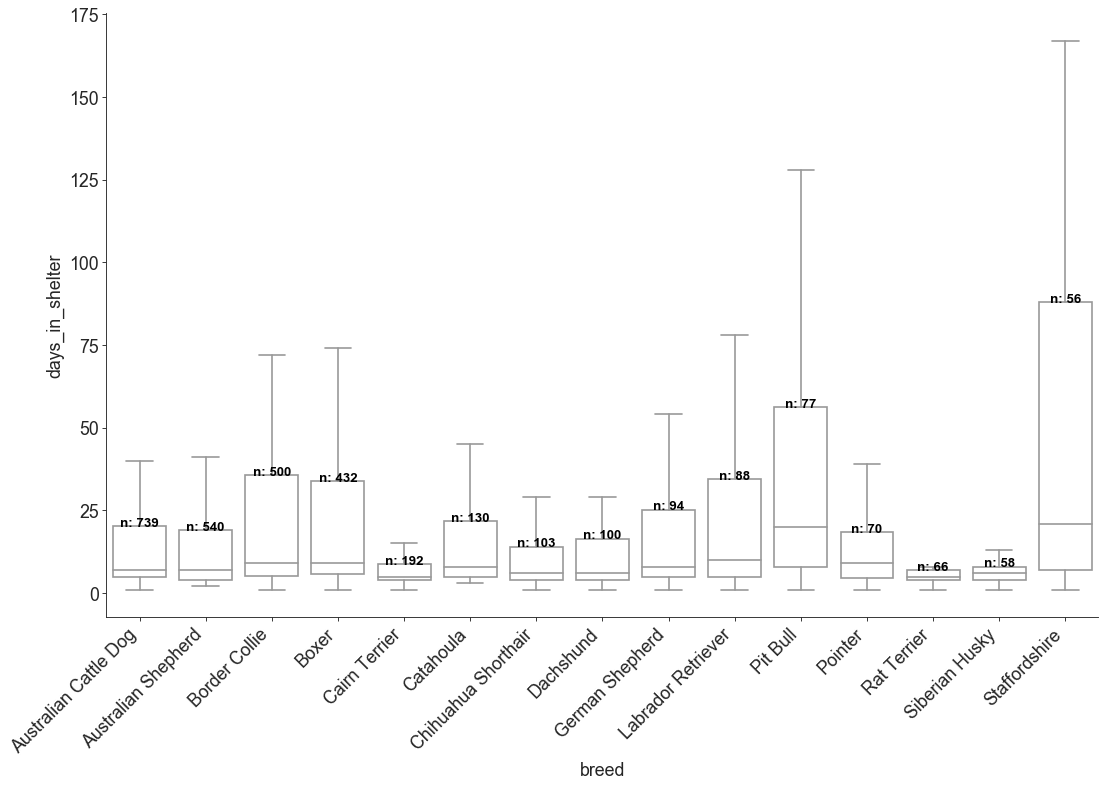

In [19]:
#medians = df.groupby(['species'])['sepal_length'].median().values


import matplotlib.pyplot as plt
import seaborn as sns

medians= test.loc[test.breed.isin(breed_list)].groupby(['breed'])["days_in_shelter"].quantile(q=.75)
medians.sort_index(inplace=True)

nobs = test.loc[test.breed.isin(breed_list)]["breed"].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

fig = plt.figure(figsize=(10, 5), dpi=80) 

# Creates one subplot within our figure and uses the classes fig and ax
fig, ax = plt.subplots(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
chart = sns.boxplot( x=test.loc[test.breed.isin(breed_list)].sort_values(by=['breed'])["breed"], y=test.loc[test.breed.isin(breed_list)].sort_values(by=['breed'])["days_in_shelter"],color='w', showfliers=False )
#ax.xaxis.set_major_locator()
plt.xticks(rotation=45, 
    horizontalalignment='right')
#ax.set_ylim(0, 100)
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+ 0.03, nobs[tick], horizontalalignment='center', size='large', color='black', weight='semibold')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

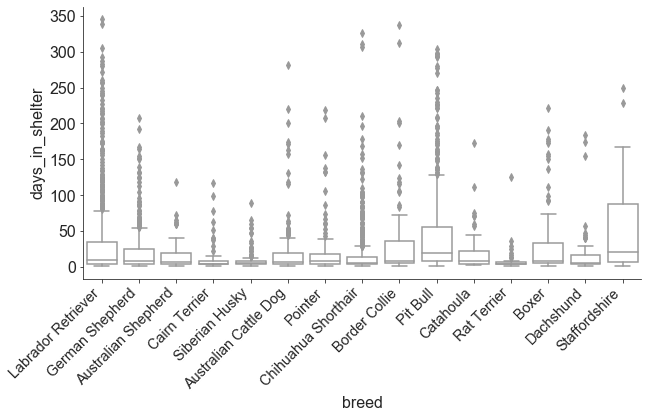

In [160]:
plt.figure(figsize=(10,5))
chart = sns.boxplot( x=test.loc[test.breed.isin(breed_list)]["breed"], y=test.loc[test.breed.isin(breed_list)]["days_in_shelter"],color='w' )

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


NameError: name 'fig' is not defined

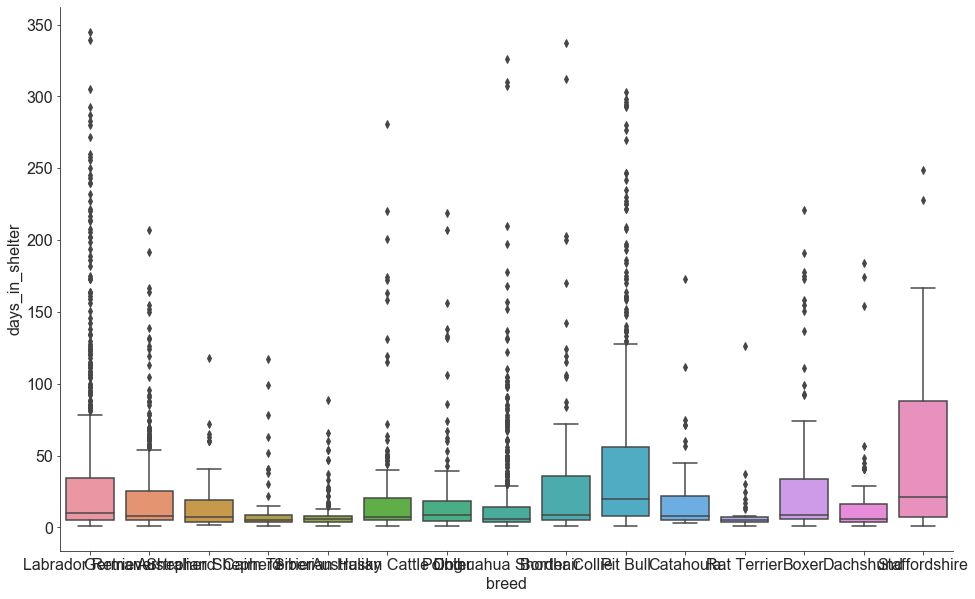

In [157]:
sns.boxplot( x=test.loc[test.breed.isin(breed_list)]["breed"], y=test.loc[test.breed.isin(breed_list)]["days_in_shelter"] )
fig.autofmt_xdate(which='both')

#sns.plt.show()

## Medical needs

1. How many animals come in injured? And what happens to them?
2. How many animals come in and over their stay get neutered?
3. Any trends in the animals that do not get neutered?

### Business Recommendations

- neutered pets get adopted at higher rates
- neutering workload is predictable - keep doing what you are doing
- while infrequent, have staff be prepared for spikes in small animal care




### Limitations

- Missing animals that came back to the shelter more than one time during a year
- Not examining animals still in the shelter
- Do not know specific costs of care or current staffing of Rescue Center
- Consistent dips in January and December might be due to how we merged the data on year, so artifical dip


### Next Steps

